In [1]:
import sys
sys.path.append('../')
import os
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from utils.imageprocessing import show_image
from utils.datasets import load_image

from tqdm.auto import tqdm

In [2]:
train_folder = '../data/2024-03-16_dataset/augmentated/train'
test_folder = '../data/2024-03-16_dataset/augmentated/test'

train_images_folder = '../data/2024-03-16_dataset/augmentated/train/images'
train_masks_folder = '../data/2024-03-16_dataset/augmentated/train/masks'
test_images_folder = '../data/2024-03-16_dataset/augmentated/test/images'
test_masks_folder = '../data/2024-03-16_dataset/augmentated/test/masks'

if not os.path.exists(train_folder):
    os.mkdir(train_folder)
    if not os.path.exists(train_images_folder):
        os.mkdir(train_images_folder)
    if not os.path.exists(train_masks_folder):
        os.mkdir(train_masks_folder)
if not os.path.exists(test_folder):
    os.mkdir(test_folder)
    if not os.path.exists(test_images_folder):
        os.mkdir(test_images_folder)
    if not os.path.exists(test_masks_folder):
        os.mkdir(test_masks_folder)

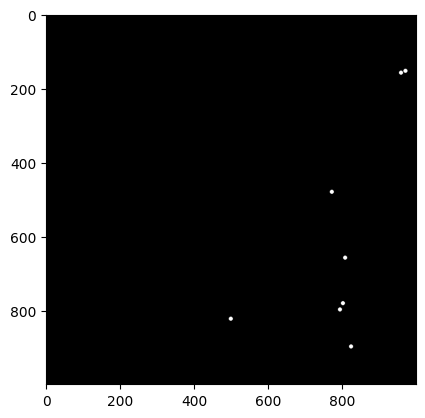

In [53]:
image = Image.open('../data/2024-03-16_dataset/augmentated/train/images/tile_tif_0_13.png')
mask = Image.open('../data/2024-03-16_dataset/augmentated/train/masks/tile_shp_0_13.png')
#show_image('../data/2024-03-16_dataset/augmentated/train/images/tile_tif_0_13.png')
plt.imshow(mask)

In [ ]:
train_folder = '../data/2024-03-16_dataset/standard/train'
test_folder = '../data/2024-03-16_dataset/standard/test'


In [3]:
def rotate_train_pairs():
    t_rot_90= T.RandomRotation((90,90))
    t_rot_180 = T.RandomRotation((180,180))
    t_rot_270 = T.RandomRotation((270,270))
    
    image_filenames = os.listdir(train_images_folder)
    total_len = len(image_filenames)
    with tqdm(total=total_len, desc='generating rotated images') as pbar:
        for image_filename in image_filenames:
            image = Image.open(os.path.join(train_images_folder,image_filename))
            filename_splitext = image_filename.split('.')
            t_rot_90(image).save(os.path.join(train_images_folder,filename_splitext[0]+'_90.'+filename_splitext[1]))
            t_rot_180(image).save(os.path.join(train_images_folder,filename_splitext[0]+'_180.'+filename_splitext[1]))
            t_rot_270(image).save(os.path.join(train_images_folder,filename_splitext[0]+'_270.'+filename_splitext[1]))

            mask_filename = image_filename.replace('tif','shp')

            mask = Image.open(os.path.join(train_masks_folder, mask_filename))
            filename_splitext = mask_filename.split('.')
            t_rot_90(mask).save(os.path.join(train_masks_folder,filename_splitext[0]+'_90.'+filename_splitext[1]))
            t_rot_180(mask).save(os.path.join(train_masks_folder,filename_splitext[0]+'_180.'+filename_splitext[1]))
            t_rot_270(mask).save(os.path.join(train_masks_folder,filename_splitext[0]+'_270.'+filename_splitext[1]))
            pbar.update(1)
rotate_train_pairs()

generating rotated images:   1%|▏         | 4/275 [00:07<08:16,  1.83s/it]


KeyboardInterrupt: 